# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [29]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [30]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint  URL with each city
    city_url= url + "&q=" + city
    print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng =   city_weather['coord']['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds =city_weather["clouds"]["all"]
        city_wind =city_weather["wind"]["speed"]
        city_country =city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=d8eb4b8c416db5d5965f233adc289682&q=port-aux-francais
Processing Record 1 of Set 1 | port-aux-francais
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=d8eb4b8c416db5d5965f233adc289682&q=adamstown
Processing Record 2 of Set 1 | adamstown
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=d8eb4b8c416db5d5965f233adc289682&q=longyearbyen
Processing Record 3 of Set 1 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=d8eb4b8c416db5d5965f233adc289682&q=georgetown
Processing Record 4 of Set 1 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=d8eb4b8c416db5d5965f233adc289682&q=nelidovo
Processing Record 5 of Set 1 | nelidovo
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=d8eb4b8c416db5d5965f233adc289682&q=quellon
Processing Record 6 of Set 1 | quellon
http://api

In [31]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [32]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.74,72,60,9.30,TF,1686233454
1,adamstown,-25.0660,-130.1015,21.60,60,0,5.64,PN,1686233456
2,longyearbyen,78.2186,15.6401,4.91,60,20,10.29,SJ,1686233376
3,georgetown,5.4112,100.3354,30.96,70,20,1.54,MY,1686233401
4,nelidovo,56.2211,32.7774,22.87,30,16,3.84,RU,1686233976


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.74,72,60,9.30,TF,1686233454
1,adamstown,-25.0660,-130.1015,21.60,60,0,5.64,PN,1686233456
2,longyearbyen,78.2186,15.6401,4.91,60,20,10.29,SJ,1686233376
3,georgetown,5.4112,100.3354,30.96,70,20,1.54,MY,1686233401
4,nelidovo,56.2211,32.7774,22.87,30,16,3.84,RU,1686233976


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

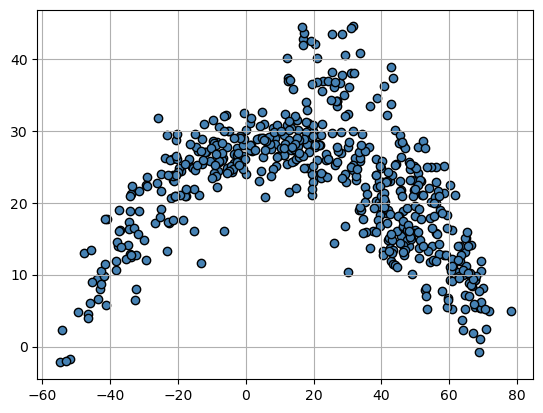

In [35]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis= city_data_df["Max Temp"]

plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o", facecolor = "steelblue", edgecolor= "black")

plt.xlabel="Latitude"
plt.ylabel= 'Max Temprature (F)'
plt.title="City Latitude vs. Max Temperature"
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

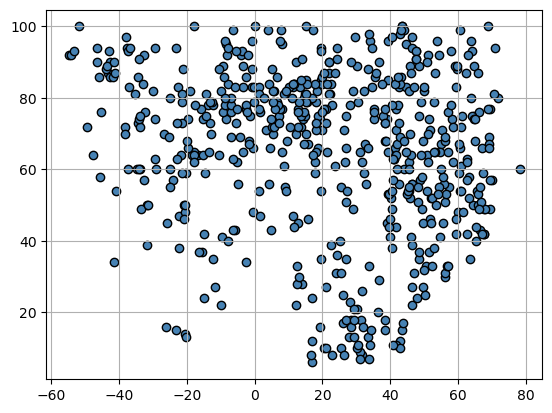

In [36]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel='Latitude'
plt.ylabel='Max Temprature (F)'
plt.title="City Latitude vs. Max Temperature"
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

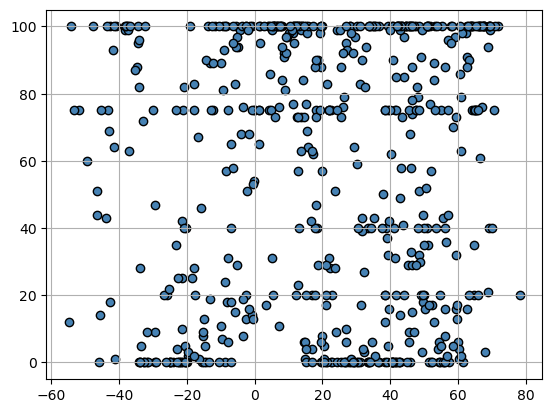

In [37]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker="o", facecolor="steelblue", edgecolor="black")

plt.xlabel= "Latitude"
plt.ylabe="Cloudiness"
plt.title="City Latitude Vs Cloudiness"
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

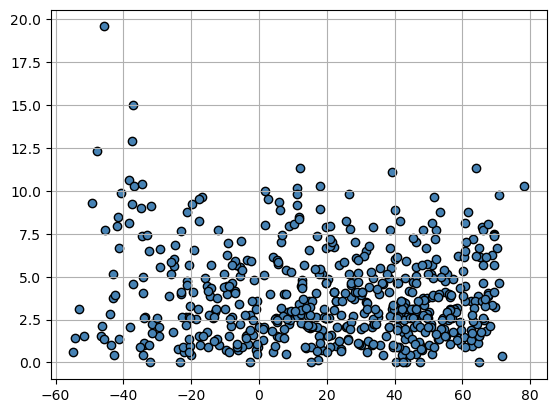

In [38]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel='latitudes'
plt.ylabel='wind speed (mph)'
plt.title="City Latitude vs. Wind Speed"
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df["Lat"], city_data_df["Wind Speed"])

regress_values = city_data_df["Lat"] * slope + intercept

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df["Lat"]>=0]


# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,longyearbyen,78.2186,15.6401,4.91,60,20,10.29,SJ,1686233376
3,georgetown,5.4112,100.3354,30.96,70,20,1.54,MY,1686233401
4,nelidovo,56.2211,32.7774,22.87,30,16,3.84,RU,1686233976
6,talnakh,69.4865,88.3972,10.48,77,100,3.22,RU,1686233482
8,howrah,22.5892,88.3103,31.00,84,75,3.60,IN,1686233477


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.74,72,60,9.30,TF,1686233454
1,adamstown,-25.0660,-130.1015,21.60,60,0,5.64,PN,1686233456
5,quellon,-43.1167,-73.6167,9.14,87,75,5.14,CL,1686233478
7,papatowai,-46.5619,169.4708,4.50,90,44,1.56,NZ,1686233462
10,bredasdorp,-34.5322,20.0403,17.32,73,95,7.39,ZA,1686233456


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5404338937020299


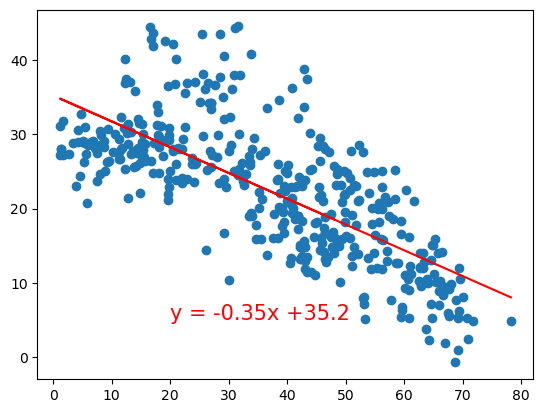

In [42]:
# Linear regression on Northern Hemisphere

# Linear regression of Latitude vs. Max. Temp:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot:
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

plt.xlabel= "latitudes"
plt.ylabel= "max Temps"
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

TypeError: 'str' object is not callable

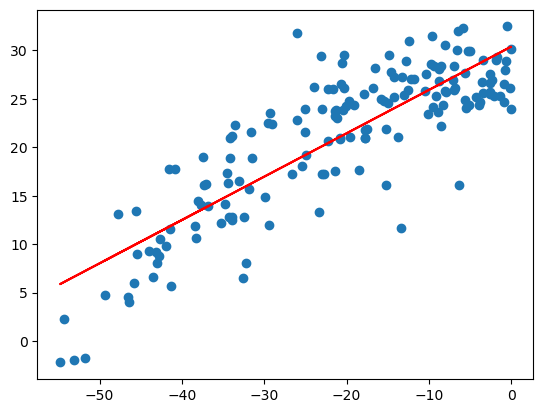

In [43]:
# Linear regression on Southern Hemisphere

# Linear regression of Latitude vs. Max Temperature for Southern Hemisphere:
(slope, intercept, rvalue, pvalue, stderr)= linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept

#Create Equation String
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot:
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# labels and annotate:
plt.annotate(line_eq,(20,5), fontsize=15, color="red")
plt.xlabel("latitudes")
plt.ylabel("max temps")


# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot:
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

TypeError: 'str' object is not callable

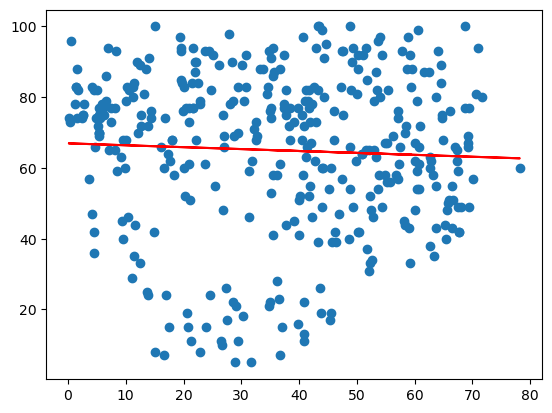

In [ ]:
# Northern Hemisphere
#Linear Regression of Latitude vs. Humidity for the Northern Hemisphere:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create  Equation String
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Create Plot:
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Create labels and annotate:
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(20,5), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot:
plt.show()

TypeError: 'str' object is not callable

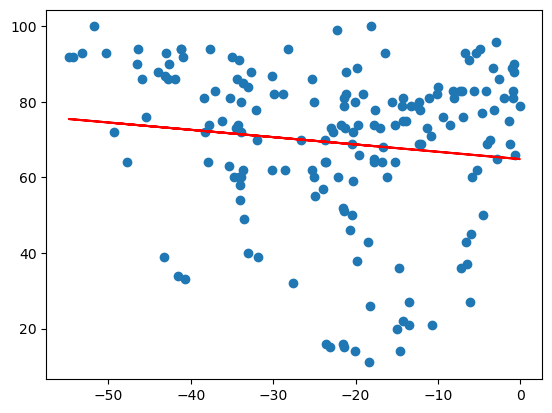

In [ ]:
# Southern Hemisphere

#Linear Regression of Latitude vs. Humidity for the Southern Hemisphere:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create Lne Equation String
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Create Plot:
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Create labels and annotate:
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-40,40), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot:
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

TypeError: 'str' object is not callable

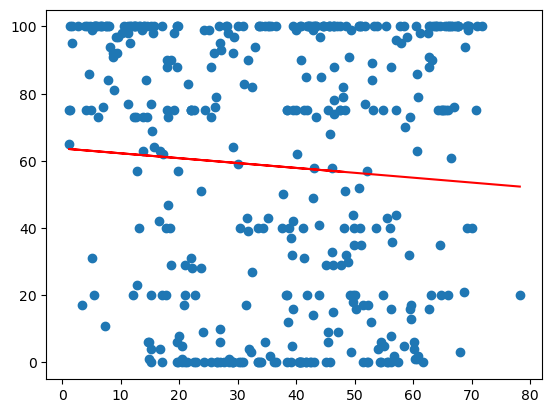

In [45]:
# Northern Hemisphere

#Linear Regression of Latitude vs. Cloudiness for the Northern Hemisphere:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create Line Equation String
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Create Plot:
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Create labels and annotate:
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(20,5), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot:
plt.show()

TypeError: 'str' object is not callable

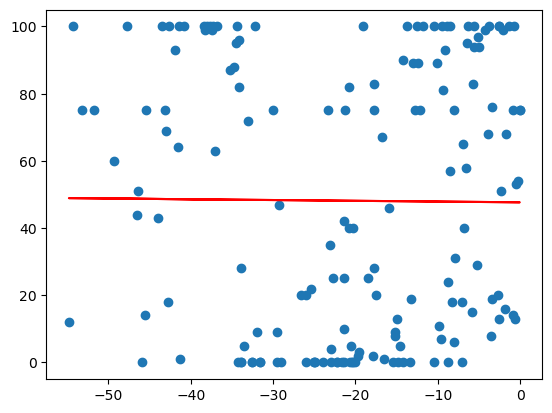

In [44]:
# Southern Hemisphere
# Linear regression of Latitude vs. Cloudiness:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create Line Equation String:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot:
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")


# Label plot and annotate the line equation:
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")


# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

TypeError: 'str' object is not callable

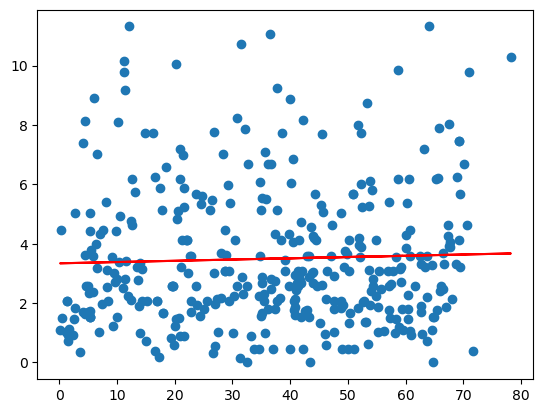

In [ ]:
# Northern Hemisphere
#Linear Regression of Latitude vs. Wind Speed for the Northern Hemisphere:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create Line Equation String
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Create Plot:
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Create labels and annotate:
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(20,5), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot:
plt.show()

TypeError: 'str' object is not callable

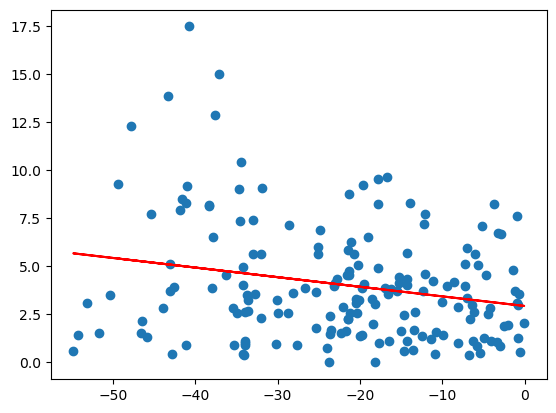

In [ ]:
# Southern Hemisphere
# Linear regression of Latitude vs. Wind Speed:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create Line Equation String:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot:
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")


# Label plot and annotate the line equation:
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")


# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE